In [45]:
#import sys

#!$sys.executable -m pip install --upgrade scipy --trusted-host pypi.org --trusted-host files.pythonhosted.org

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir='C:/Users/Animesh.Parikshya/Documents/IIM Classes/Data sets'
os.chdir(data_dir)

In [3]:
data=pd.read_csv("pollution_india_2010.csv",na_values='Null')

In [4]:
data.head()

,City,NO2,PM10,SO2,State
0,Chitoor,9.0,39.0,4.0,Andhra Pradesh
1,Guntur,11.0,81.0,2.0,Andhra Pradesh
2,Hydrabad,24.0,79.0,5.0,Andhra Pradesh
3,Kothagudem,11.0,62.0,2.0,Andhra Pradesh
4,Kurnool,9.0,85.0,4.0,Andhra Pradesh


In [5]:
data.isnull().sum()

City     0
NO2      4
PM10     1
SO2      5
State    0
dtype: int64

In [6]:
data.shape

(181, 5)

In [7]:
data=data.dropna()

In [8]:
data.shape

(175, 5)

In [9]:
data.dtypes

City      object
NO2      float64
PM10     float64
SO2      float64
State     object
dtype: object

In [10]:
data_pol=data.groupby('State',as_index=False)[['NO2','PM10','SO2']].agg(np.sum)

In [11]:
data_pol.head()

,State,NO2,PM10,SO2
0,Andhra Pradesh,183.0,893.0,60.0
1,Assam,177.0,834.0,74.0
2,Bihar,40.0,181.0,7.0
3,Chandigarh,16.0,92.0,2.0
4,Chattisgarh,86.0,502.0,37.0


In [12]:
def scale(x):
    return (x-np.mean(x))/np.std(x)
data_num=data_pol.drop("State",axis=1)
data_scaled=data_num.apply(scale,axis=1)

In [13]:
data_scaled.head()

,NO2,PM10,SO2
0,-0.532950,1.400923,-0.867973
1,-0.548580,1.403137,-0.854557
2,-0.477083,1.391492,-0.914409
3,-0.522653,1.399362,-0.876709
4,-0.586407,1.407697,-0.821290


In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [15]:
import scipy

In [16]:
scipy.__version__

'1.6.1'

In [17]:
data_scaled=np.array(data_scaled)
state_ar = np.array(data_pol.State)

In [18]:
state_ar

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chattisgarh',
       'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'HimachalPradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'MadhyaPradesh', 'Maharashtra',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Orissa', 'Puducherry',
       'Punjab', 'Rajasthan', 'Tamilnadu', 'UttarPradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [19]:
len(state_ar)

29

In [20]:
Z=linkage(data_scaled,method="ward")

In [21]:
Z.shape[0]

28

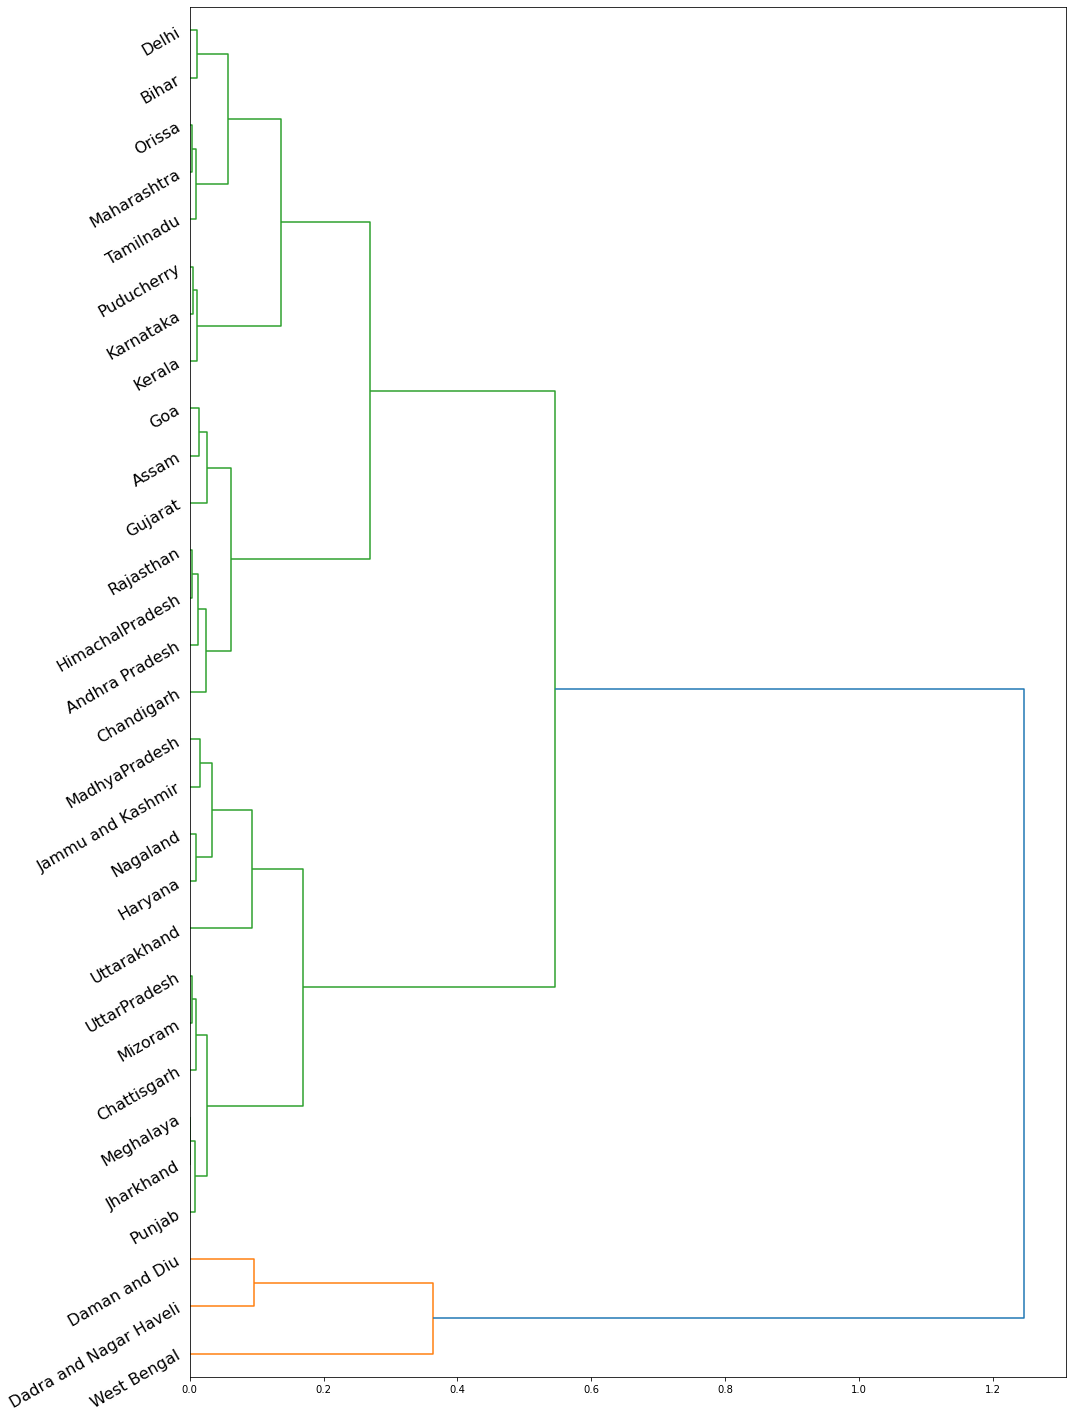

In [22]:
fig, ax = plt.subplots(figsize=(15, 20))
ax=dendrogram(Z,orientation="right",labels = state_ar,leaf_rotation=30,leaf_font_size=16)
plt.tight_layout()
plt.show()